In [4]:
import pandas as pd 
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
#Importing Data
df= pd.read_excel("default of credit card clients.xls", skiprows=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#Droping ID Column
df = df.drop('ID', axis=1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
df.shape

(30000, 24)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [ ]:
#saving dataset to csv
df.to_csv('credit_card_data.csv', index=False)

Cluster
1    17051
2     9361
0     3588
Name: count, dtype: int64
   LIMIT_BAL  AGE  Cluster
0      20000   24        1
1     120000   26        1
2      90000   34        1
3      50000   37        1
4      50000   57        2
5      50000   37        1
6     500000   29        0
7     100000   23        1
8     140000   28        1
9      20000   35        2


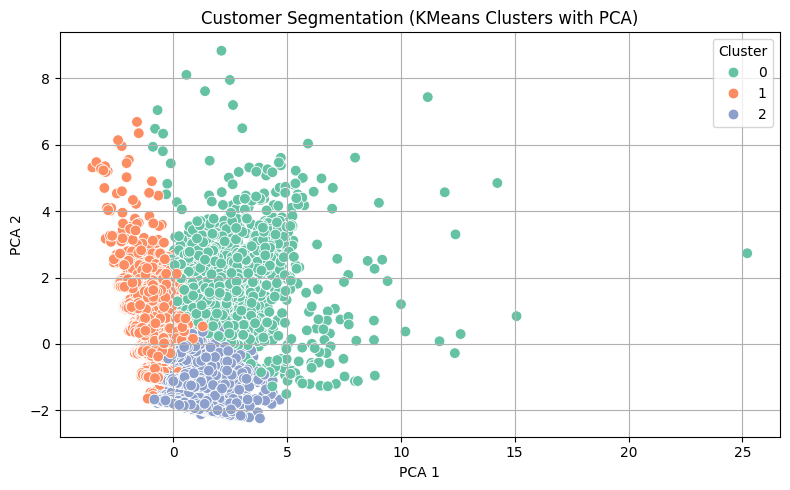

In [ ]:
#Selecting Features in DataFrame
X = df[['LIMIT_BAL', 'AGE', 'PAY_0', 'BILL_AMT1', 'PAY_AMT1']]

#Standardization(mean 0 and standard deviation 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#KMeans Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


df['Cluster'] = clusters

print(df['Cluster'].value_counts())
print(df[['LIMIT_BAL', 'AGE', 'Cluster']].head(10))

#Dimensionality Reduction with PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)


df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Plot clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title('Customer Segmentation (KMeans Clusters with PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


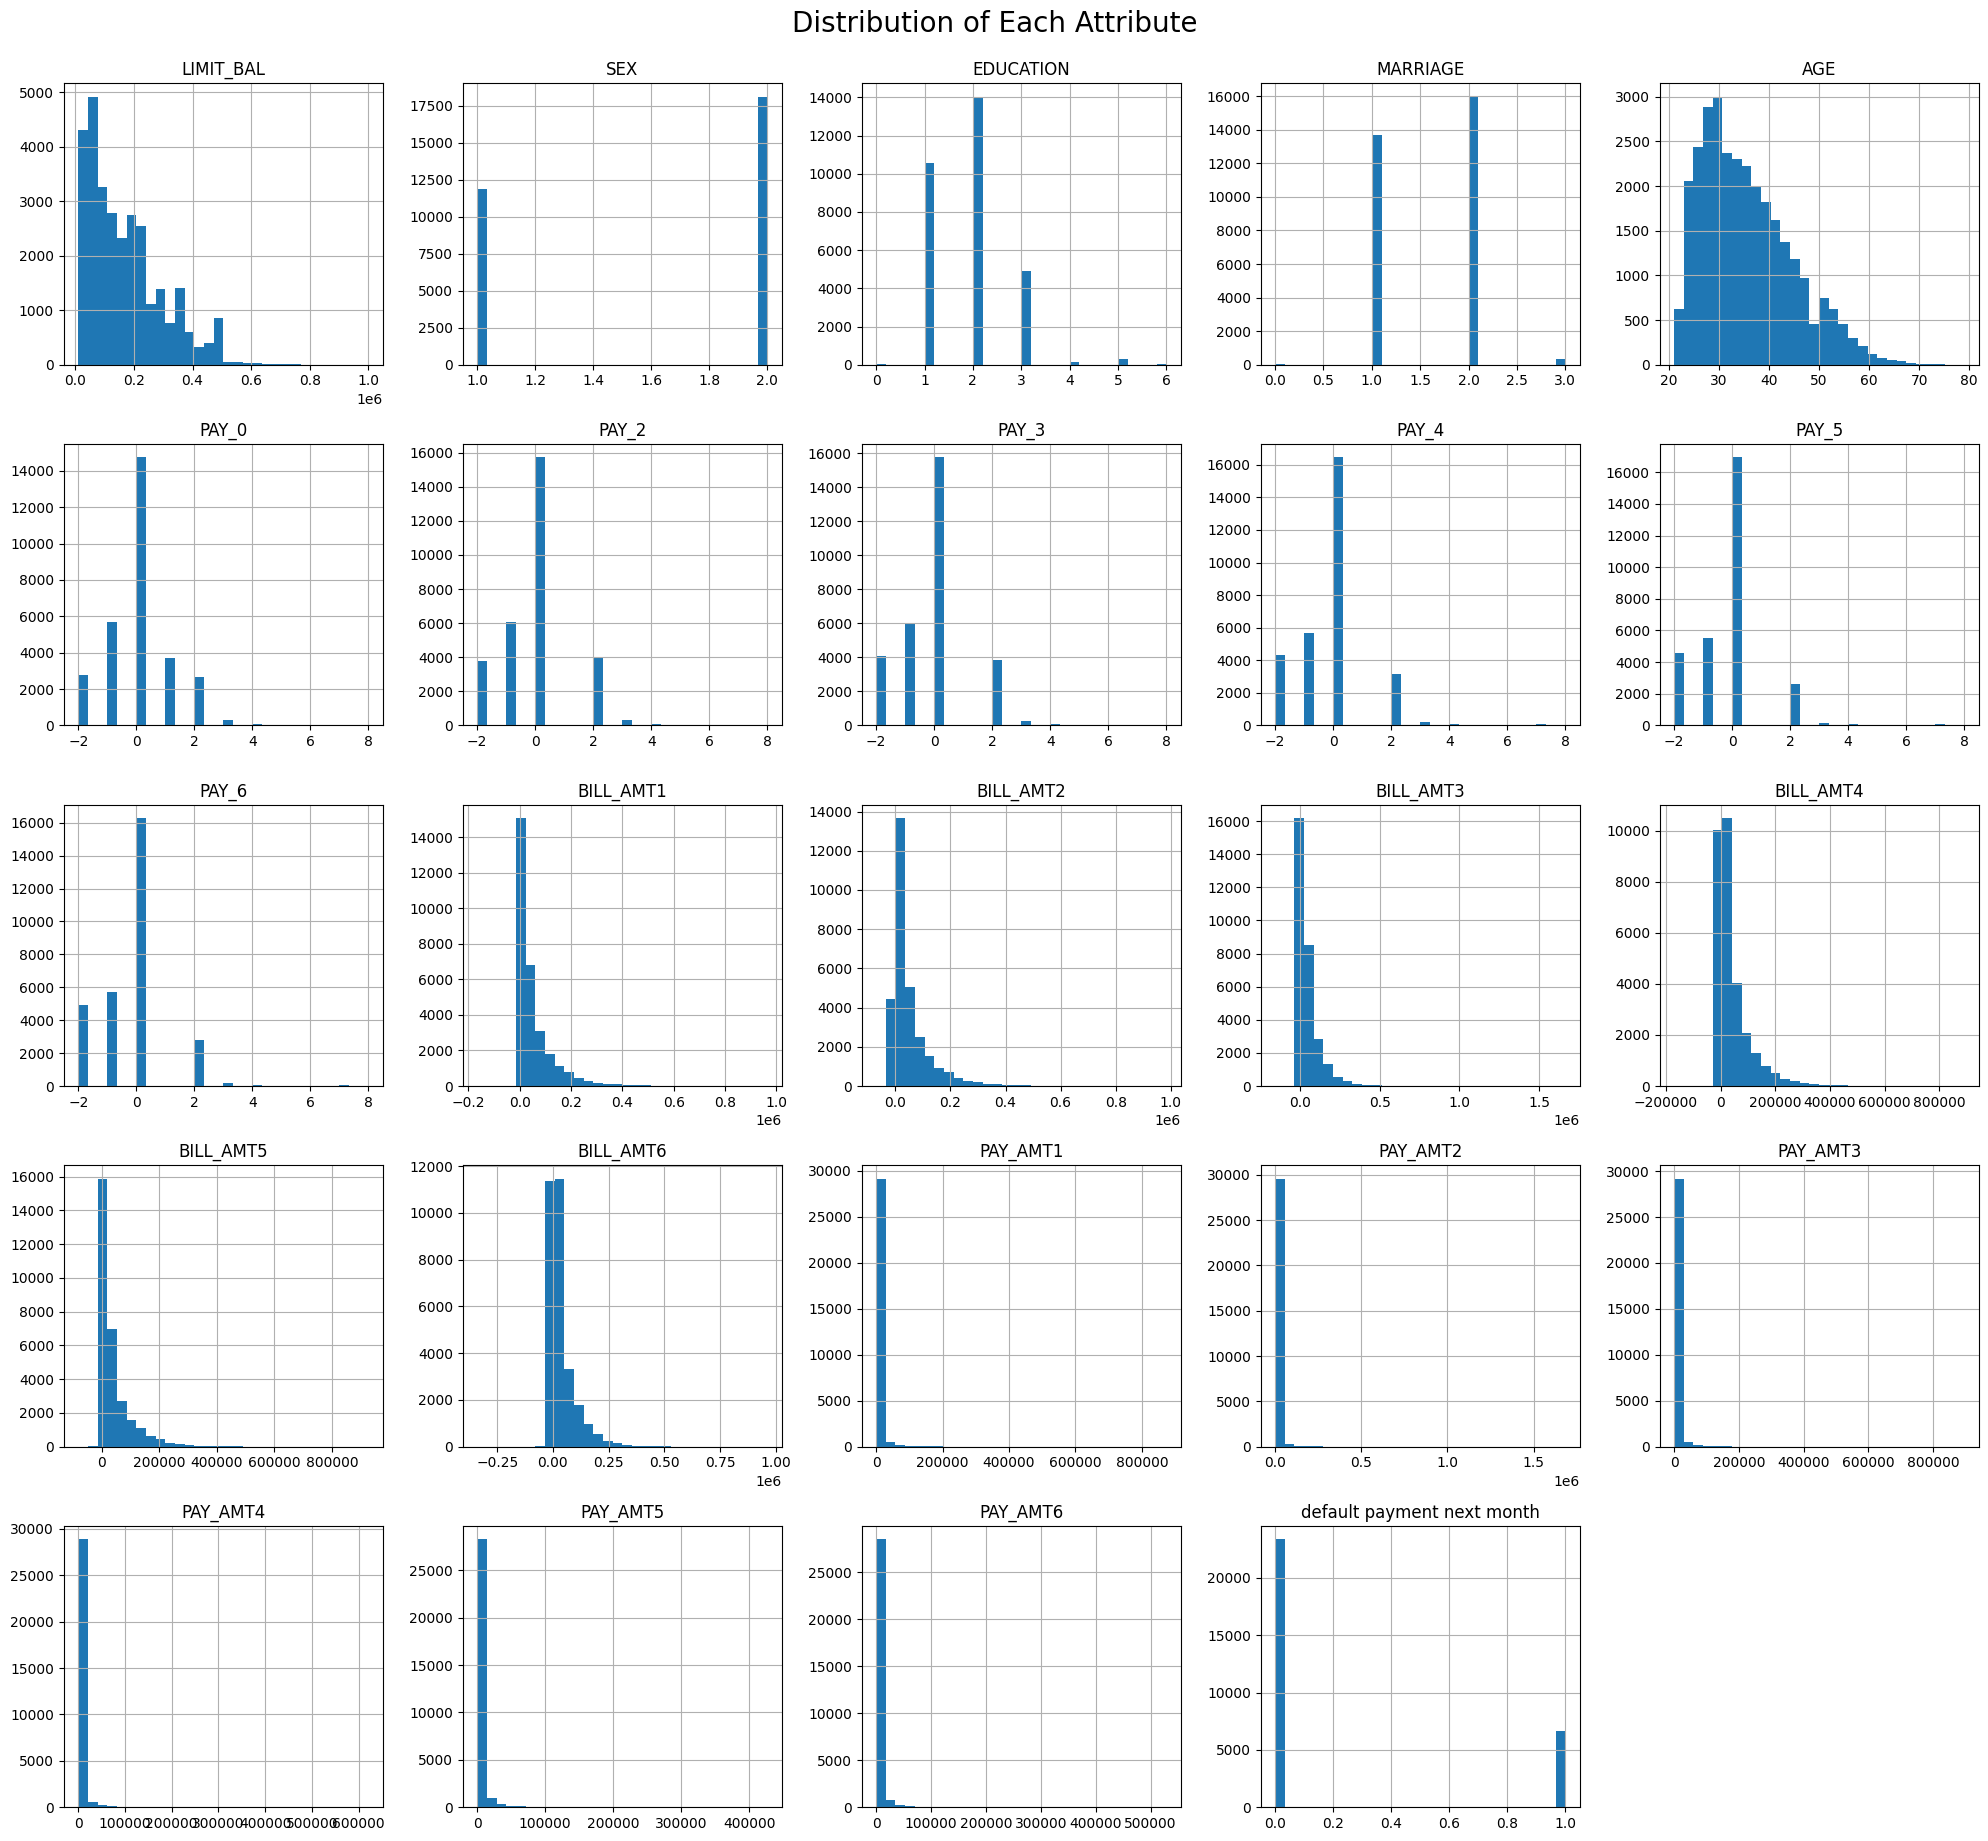

In [5]:
#1.The distribution for each of attributes

df = df.drop('ID', axis=1)

df.hist(bins=30, figsize=(20, 18), layout=(5, 5))
plt.tight_layout()
plt.suptitle('Distribution of Each Attribute', fontsize=20, y=1.02)
plt.show()


In [ ]:
#2. Skewness 
skewness_df = pd.DataFrame({'Attribute': skewness.index, 'Skewness': skewness.values})
skewness_df = skewness_df.sort_values(by='Skewness', ascending=False)
print(skewness_df)

                     Attribute   Skewness
18                    PAY_AMT2  30.453817
19                    PAY_AMT3  17.216635
17                    PAY_AMT1  14.668364
20                    PAY_AMT4  12.904985
21                    PAY_AMT5  11.127417
22                    PAY_AMT6  10.640727
13                   BILL_AMT3   3.087830
15                   BILL_AMT5   2.876380
16                   BILL_AMT6   2.846645
14                   BILL_AMT4   2.821965
12                   BILL_AMT2   2.705221
11                   BILL_AMT1   2.663861
25                        PCA1   1.827677
23  default payment next month   1.343504
9                        PAY_5   1.008197
8                        PAY_4   0.999629
0                    LIMIT_BAL   0.992867
2                    EDUCATION   0.970972
10                       PAY_6   0.948029
7                        PAY_3   0.840682
6                        PAY_2   0.790565
4                          AGE   0.732246
5                        PAY_0   0

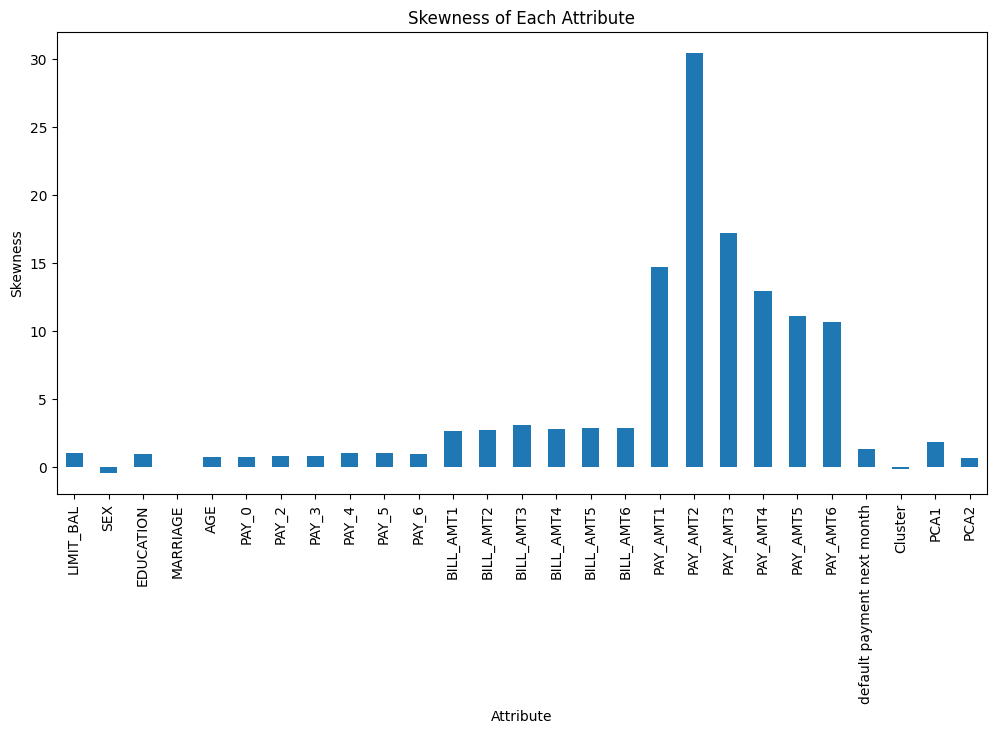

In [14]:
import matplotlib.pyplot as plt

skewness.plot(kind='bar', figsize=(12, 6))
plt.title('Skewness of Each Attribute')
plt.ylabel('Skewness')
plt.xlabel('Attribute')
plt.show()

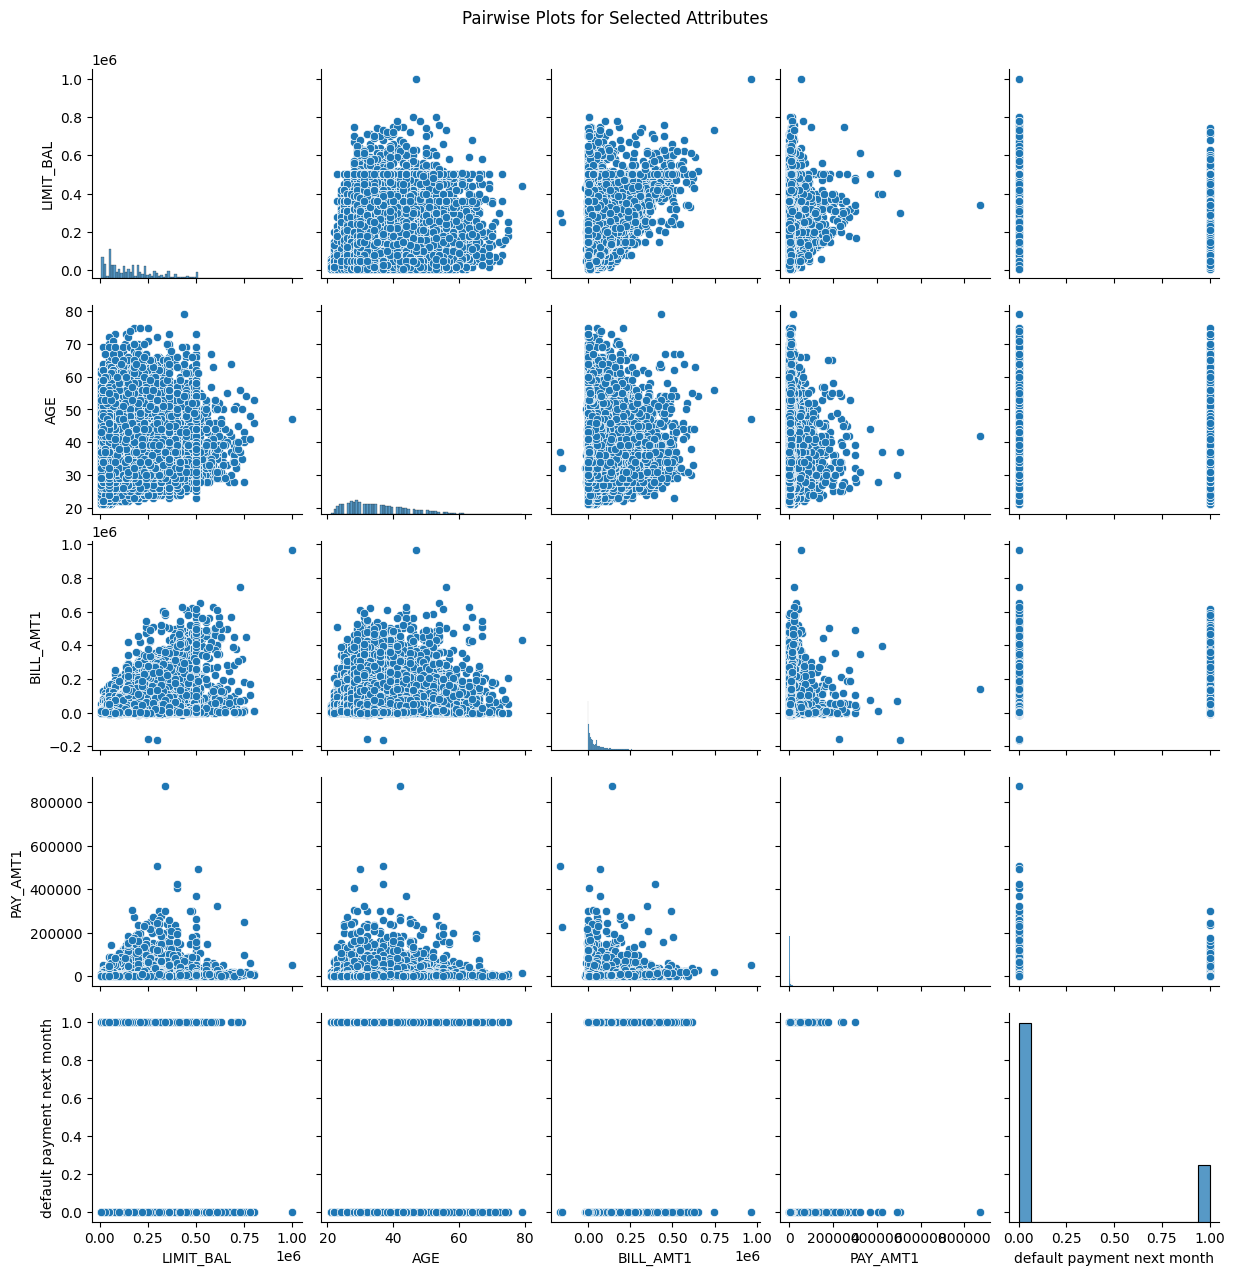

In [16]:
#focusing on specific attributes
import seaborn as sns
import matplotlib.pyplot as plt

selected_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1', 'default payment next month']

# Create the pairplot
sns.pairplot(df[selected_cols])
plt.suptitle('Pairwise Plots for Selected Attributes', y=1.02)
plt.show()

In [3]:
#Detecting the outliers
import numpy as np
import pandas as pd


df = pd.read_excel('default of credit card clients.xls', header=1)
df.head()

# Detect outliers for each attribute using the IQR method

outlier_summary = {}

for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)
    print(f"{col}: {len(outliers)} outliers")

# Optionally, show a summary
outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=['Attribute', 'Number of Outliers'])
outlier_df = outlier_df.sort_values(by='Number of Outliers', ascending=False)
display(outlier_df)

ID: 0 outliers
LIMIT_BAL: 167 outliers
SEX: 0 outliers
EDUCATION: 454 outliers
MARRIAGE: 0 outliers
AGE: 272 outliers
PAY_0: 3130 outliers
PAY_2: 4410 outliers
PAY_3: 4209 outliers
PAY_4: 3508 outliers
PAY_5: 2968 outliers
PAY_6: 3079 outliers
BILL_AMT1: 2400 outliers
BILL_AMT2: 2395 outliers
BILL_AMT3: 2469 outliers
BILL_AMT4: 2622 outliers
BILL_AMT5: 2725 outliers
BILL_AMT6: 2693 outliers
PAY_AMT1: 2745 outliers
PAY_AMT2: 2714 outliers
PAY_AMT3: 2598 outliers
PAY_AMT4: 2994 outliers
PAY_AMT5: 2945 outliers
PAY_AMT6: 2958 outliers
default payment next month: 6636 outliers


,Attribute,Number of Outliers
24,default payment next month,6636
7,PAY_2,4410
8,PAY_3,4209
9,PAY_4,3508
6,PAY_0,3130
11,PAY_6,3079
21,PAY_AMT4,2994
10,PAY_5,2968
23,PAY_AMT6,2958
22,PAY_AMT5,2945


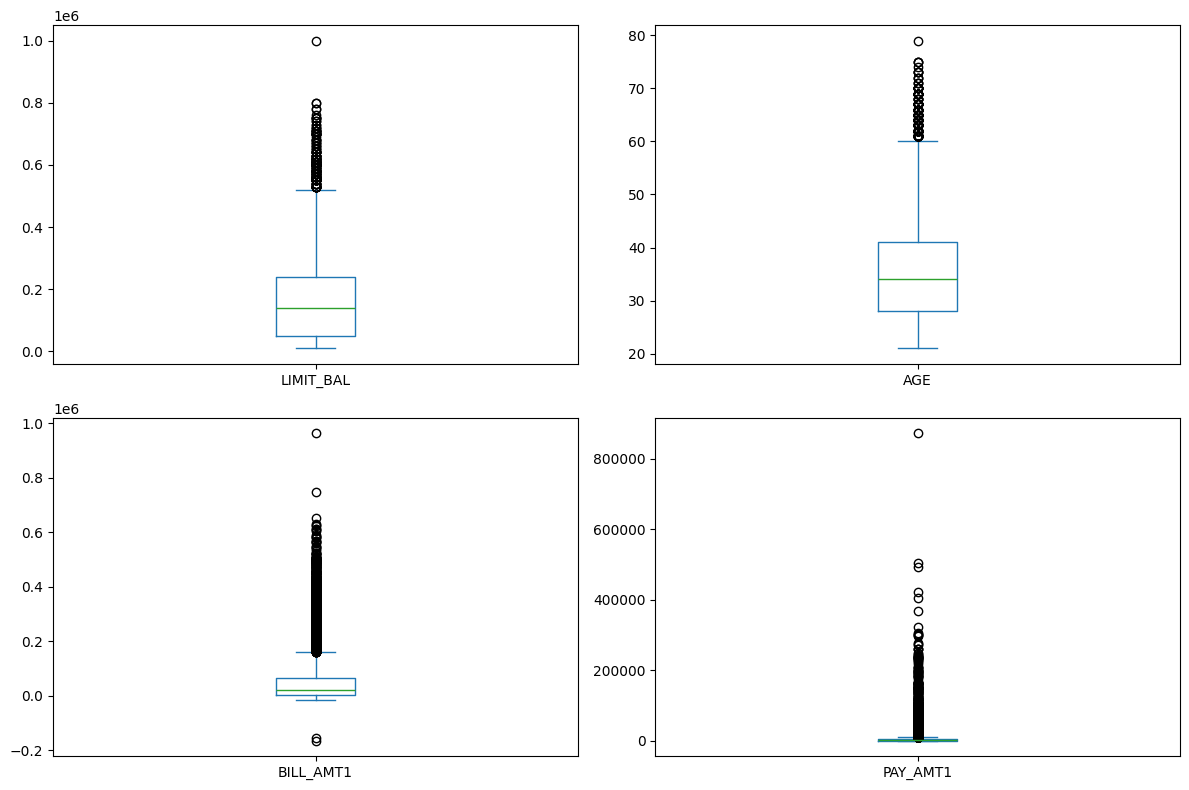

In [12]:
# The outliers-
import matplotlib.pyplot as plt

selected_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1']  # or any columns you want
df[selected_cols].plot(kind='box', subplots=True, layout=(2,2), figsize=(12,8), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [30]:
#5.Normalization/ scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(scaled_df.head())

   LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
0  -1.080121  0.801058    0.15196 -1.081641 -1.207706  1.710292  1.665585   
1  -0.116503  0.801058    0.15196  0.831035 -0.985166 -0.891512  1.665585   
2  -0.405588  0.801058    0.15196  0.831035 -0.095004 -0.024244  0.078004   
3  -0.791036  0.801058    0.15196 -1.081641  0.238807 -0.024244  0.078004   
4  -0.791036 -1.248349    0.15196 -1.081641  2.464212 -0.891512  0.078004   

      PAY_3     PAY_4     PAY_5  ...  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0 -0.663038 -0.633642 -1.443837  ... -1.150645 -0.212568 -0.305062 -0.302354   
1  0.135301  0.174631  0.221657  ... -1.150645 -0.189927 -0.209685 -0.201767   
2  0.135301  0.174631  0.221657  ... -0.234485 -0.153526 -0.209685 -0.201767   
3  0.135301  0.174631  0.221657  ...  0.056417 -0.115743 -0.190609 -0.191709   
4 -0.663038  0.174631  0.221657  ...  0.056417  2.407686  0.648709  0.602923   

   PAY_AMT5  PAY_AMT6  default payment next month   Clus

In [36]:
#Min-Max normalization of all columns

from sklearn.preprocessing import MinMaxScaler

exclude_cols = ['PCA1', 'PCA2', 'Cluster', 'default payment next month']

df_corr = df.drop(columns=[col for col in exclude_cols if col in df.columns])

scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(normalized_df.head())

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   0.024390  1.0   0.333333  0.333333  0.057143    0.4    0.4    0.1    0.1   
1   0.268293  1.0   0.333333  0.666667  0.114286    0.1    0.4    0.2    0.2   
2   0.195122  1.0   0.333333  0.666667  0.342857    0.2    0.2    0.2    0.2   
3   0.097561  1.0   0.333333  0.333333  0.428571    0.2    0.2    0.2    0.2   
4   0.097561  0.0   0.333333  0.333333  1.000000    0.1    0.2    0.1    0.2   

   PAY_5  ...  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0    0.0  ...  0.000000  0.000673  0.000000  0.000000  0.000000  0.000000   
1    0.2  ...  0.000000  0.000976  0.003005  0.003014  0.000000  0.004957   
2    0.2  ...  0.241527  0.001464  0.003005  0.003014  0.003224  0.012392   
3    0.2  ...  0.318218  0.001971  0.003606  0.003315  0.003447  0.002478   
4    0.2  ...  0.318218  0.035803  0.030047  0.027126  0.002222  0.001683   

   default payment next month  Cluster      PCA1      PC

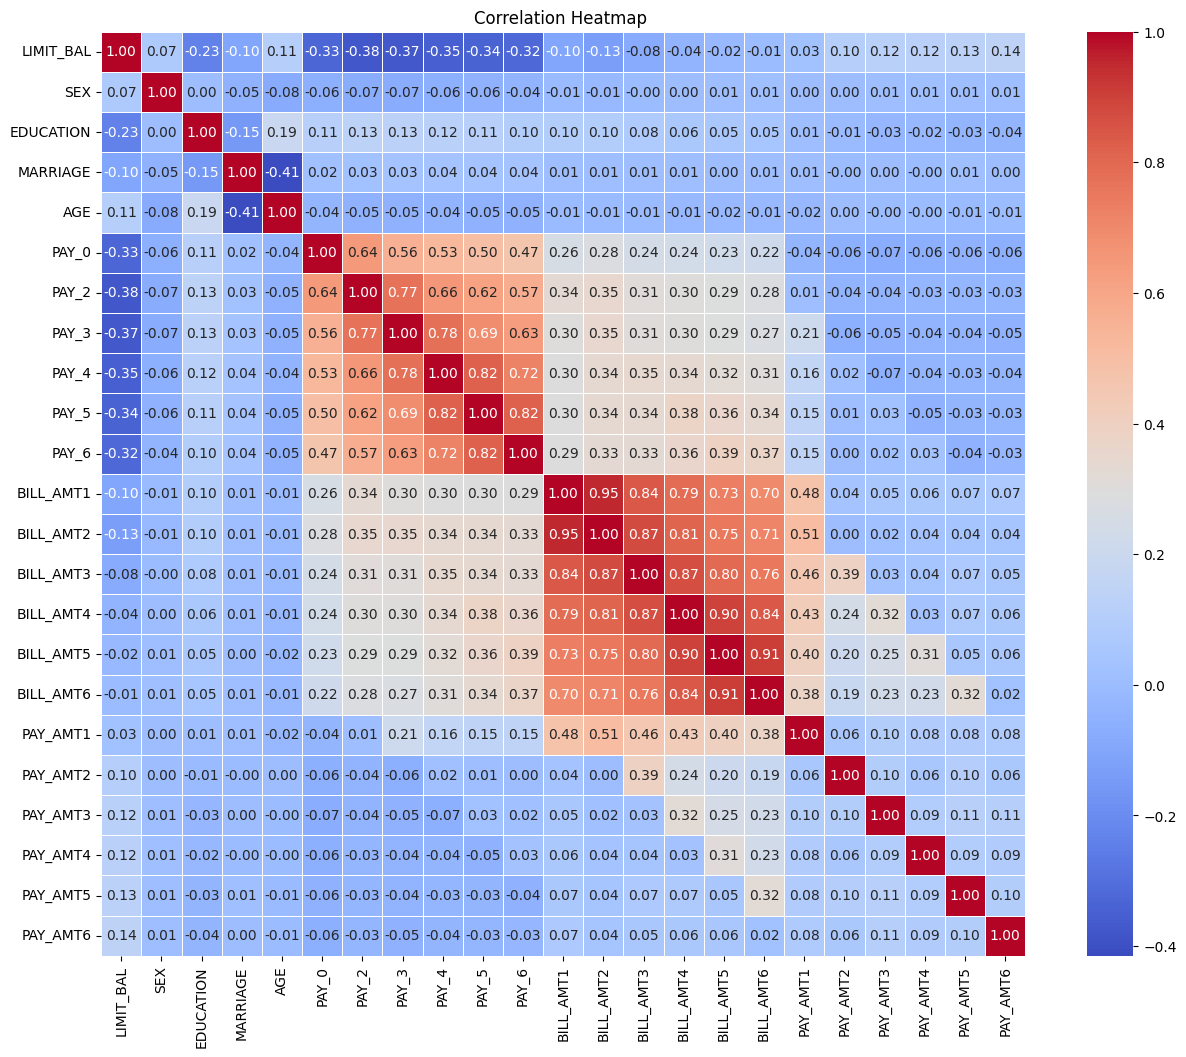

In [37]:
#6.correlation of the attributes -(headmap)-

import matplotlib.pyplot as plt
import seaborn as sns

exclude_cols = ['PCA1', 'PCA2', 'Cluster', 'default payment next month']

df_corr = df.drop(columns=[col for col in exclude_cols if col in df.columns])

corr_matrix = df_corr.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap ')
plt.show()

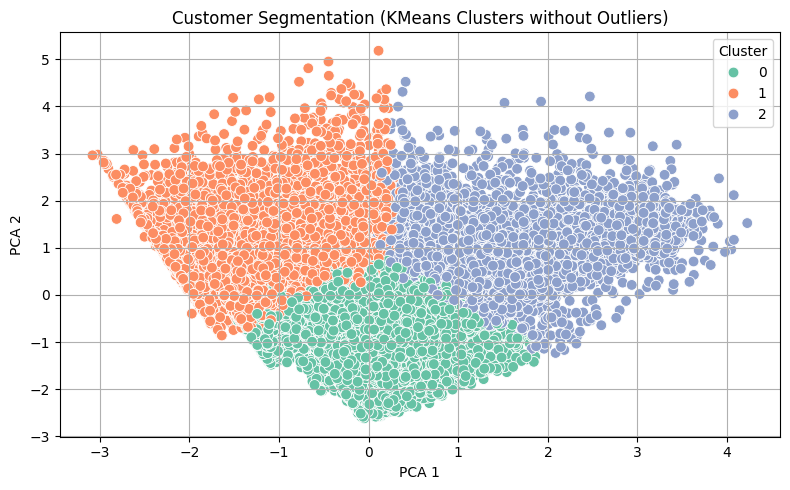

In [ ]:
#Cluster without outliers
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Remove outliers using the IQR method
features = ['LIMIT_BAL', 'AGE', 'PAY_0', 'BILL_AMT1', 'PAY_AMT1']
df_no_outliers = df.copy()
for col in features:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower) & (df_no_outliers[col] <= upper)]

# 2. Standardize the features
X = df_no_outliers[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_no_outliers['Cluster'] = clusters

# 4. PCA for 2D visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df_no_outliers['PCA1'] = pca_components[:, 0]
df_no_outliers['PCA2'] = pca_components[:, 1]

# 5. Plot clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_no_outliers, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title('Customer Segmentation (KMeans Clusters without Outliers)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

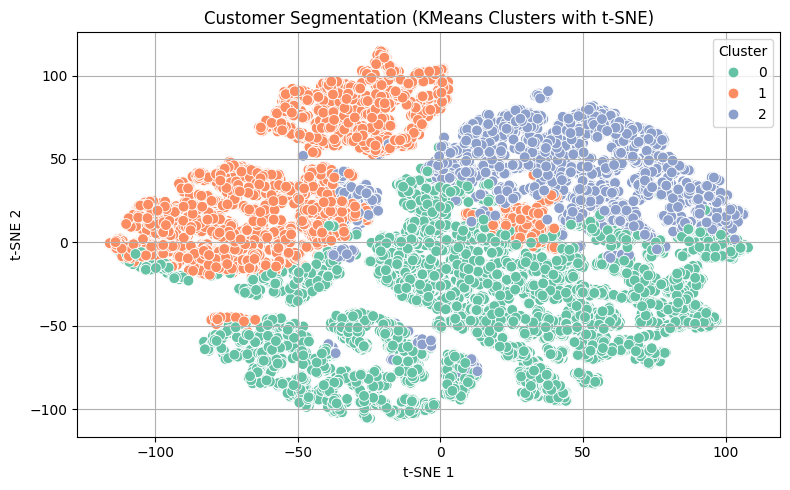

In [27]:
from sklearn.manifold import TSNE

X = df_no_outliers[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_components = tsne.fit_transform(X_scaled)
df_no_outliers['TSNE1'] = tsne_components[:, 0]
df_no_outliers['TSNE2'] = tsne_components[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_no_outliers, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set2', s=60)
plt.title('Customer Segmentation (KMeans Clusters with t-SNE)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()